In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [121]:
df=pd.read_csv(r"D:\COURSES\AI\Epsilon Ai\Session 30\bikes.csv")

In [122]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


In [123]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count'],
      dtype='object')

In [124]:
def calcualte(x):
    cauasal_cus=x[0]
    register_cus=x[1]
    registerd_per_hour=5
    casual_per_hour=20
    taxes=.14
    maintenance_per_hour=1500/(365*24)
    profit_cash=cauasal_cus*casual_per_hour+register_cus*registerd_per_hour
    profit_with_taxes=profit_cash-(taxes*profit_cash)
    total_profit=profit_with_taxes-maintenance_per_hour
    return total_profit
df["profit"]=df[['casual','registered']].apply(calcualte,axis=1)

In [125]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


In [126]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit'],
      dtype='object')

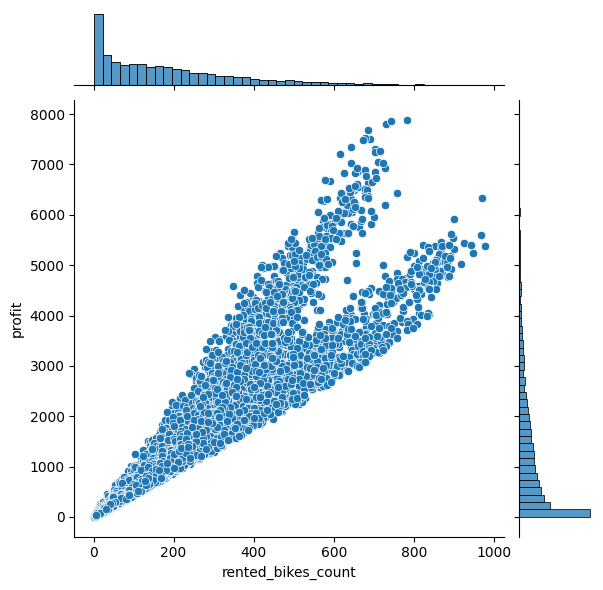

In [127]:
sns.jointplot(x=df['rented_bikes_count'],y=df["profit"])

In [128]:
df['rented_bikes_count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: rented_bikes_count, dtype: float64

In [129]:
df[df["rented_bikes_count"]==df["rented_bikes_count"].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
9345,2012-09-12 18:00:00,Fall,0.0,NaN,Clear,27.06,NaN,16.9979,91,886,977,5374.828767


In [130]:
df[df["profit"]==df["profit"].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
9415,2012-09-15 16:00:00,Fall,0.0,0.0,Mist,NaN,36.0,15.0013,350,433,783,7881.728767


**profit for each day**

In [131]:
df["datetime"]=pd.to_datetime(df["datetime"],format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [132]:
df['year']=df["datetime"].dt.year
df['month']=df["datetime"].dt.month
df['day_of_week']=df["datetime"].dt.day_name()
df["hours"]=df["datetime"].dt.hour

In [133]:
df.groupby('day_of_week').describe()[['rented_bikes_count',"profit"]].transpose()

day_of_week                    Friday       Monday     Saturday       Sunday  \
rented_bikes_count count  1529.000000  1551.000000  1584.000000  1579.000000   
                   mean    197.844343   190.390716   196.665404   180.839772   
                   min       1.000000     1.000000     1.000000     1.000000   
                   25%      52.000000    39.000000    45.000000    43.000000   
                   50%     167.000000   146.000000   141.500000   119.000000   
                   75%     290.000000   277.500000   309.500000   298.000000   
                   max     900.000000   968.000000   783.000000   757.000000   
                   std     172.518208   180.943376   180.917795   167.022145   
profit             count  1529.000000  1551.000000  1584.000000  1579.000000   
                   mean   1250.484751  1203.496079  1666.252504  1513.401535   
                   min       4.128767     4.128767     4.128767     4.128767   
                   25%     300.828767   249.228767   283.628767   287.928767   
                   50%    1036.128767   954.428767   956.578767   812.528767   
                   75%    1891.828767  1827.328767  2614.228767  2429.328767   
                   max    5908.028767  5594.128767  7881.728767  7034.628767   
                   std    1110.019552  1129.727600  1772.625088  1571.404307   

day_of_week                  Thursday      Tuesday    Wednesday  
rented_bikes_count count  1553.000000  1539.000000  1551.000000  
                   mean    197.296201   189.723847   188.411348  
                   min       1.000000     1.000000     1.000000  
                   25%      44.000000    36.000000    38.000000  
                   50%     155.000000   146.000000   136.000000  
                   75%     280.000000   274.000000   270.500000  
                   max     901.000000   970.000000   977.000000  
                   std     187.606619   186.719673   190.942004  
profit             count  1553.000000  1539.000000  1551.000000  
                   mean   1157.893803  1112.073082  1100.526188  
                   min       4.128767     4.128767     4.128767  
                   25%     236.328767   210.528767   210.528767  
                   50%     911.428767   834.028767   791.028767  
                   75%    1741.328767  1704.778767  1657.478767  
                   max    5533.928767  6338.028767  5447.928767  
                   std    1086.029849  1065.481400  1111.243780

* which season has more regesstrio or profit 

In [134]:
df.groupby("season").describe()["profit"].transpose()

season,Fall,Spring,Summer,Winter
count,2680.000000,2634.000000,2670.000000,2688.000000
mean,1682.572797,697.150331,1533.249029,1222.474898
min,4.128767,4.128767,4.128767,4.128767
25%,445.953767,128.828767,318.028767,292.228767
50%,1412.378767,436.278767,1212.428767,935.078767
75%,2472.328767,914.653767,2244.428767,1751.003767
max,7881.728767,7679.628767,7795.728767,7864.528767
std,1429.092535,850.960767,1454.120645,1184.508417


In [135]:
df.groupby("season").describe()['rented_bikes_count'].transpose()

season,Fall,Spring,Summer,Winter
count,2680.000000,2634.000000,2670.000000,2688.000000
mean,234.471642,116.089218,214.711610,198.672247
min,1.000000,1.000000,1.000000,1.000000
25%,68.000000,23.000000,47.000000,51.000000
50%,195.000000,78.000000,171.500000,161.000000
75%,348.000000,163.000000,321.750000,294.000000
max,977.000000,801.000000,873.000000,948.000000
std,197.122029,125.353298,192.109412,177.491672


* which wather  more profit & regestrion

In [136]:
df.groupby("weather").describe()[["rented_bikes_count",'profit']].transpose()

weather                         Clear         Mist        Rainy       Snowy
rented_bikes_count count  5793.000000  2259.000000   693.000000    1.000000
                   mean    204.109442   179.722001   118.741703  164.000000
                   min       1.000000     1.000000     1.000000  164.000000
                   25%      47.000000    40.000000    24.000000  164.000000
                   50%     160.000000   137.000000    73.000000  164.000000
                   75%     302.000000   266.000000   158.000000  164.000000
                   max     977.000000   890.000000   891.000000  164.000000
                   std     187.713187   168.655730   138.911722         NaN
profit             count  5793.000000  2259.000000   693.000000    1.000000
                   mean   1391.800302  1171.014380   735.358349  782.428767
                   min       4.128767     4.128767     4.128767  782.428767
                   25%     283.628767   244.928767   128.828767  782.428767
                   50%    1006.028767   834.028767   399.728767  782.428767
                   75%    2055.228767  1758.528767   932.928767  782.428767
                   max    7795.728767  7881.728767  5542.528767  782.428767
                   std    1372.771954  1164.297225   925.280928         NaN

5. corr between profit and bike count withh all feature.

In [137]:
numeric_df = df.select_dtypes(include=['number'])
# Compute correlation matrix and select specific columns
correlation_selected = numeric_df.corr()[["rented_bikes_count", 'profit']]
correlation_selected

,rented_bikes_count,profit
holiday,-0.005827,0.017410
workingday,0.010940,-0.150218
temp,0.391867,0.462618
humidity,-0.317282,-0.358150
windspeed,0.097747,0.100205
casual,0.690414,0.902713
registered,0.970948,0.822156
rented_bikes_count,1.000000,0.934490
profit,0.934490,1.000000
year,0.260403,0.226345


<Axes: >

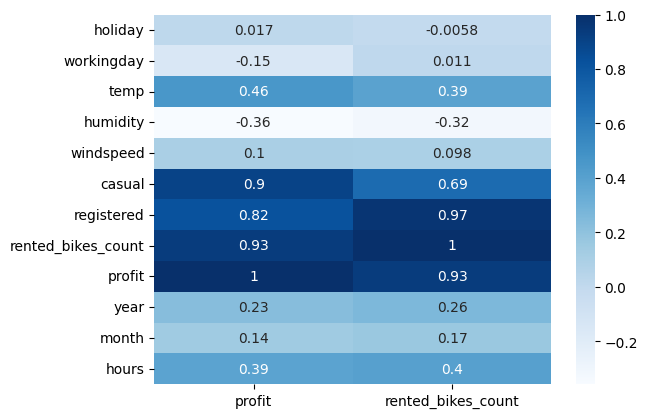

In [138]:
sns.heatmap(correlation_selected[['profit',"rented_bikes_count"]],annot=True,cmap="Blues")

* rental during rush our (7-9 am & 17-15 pm).


In [139]:
df["is_rush"] = [1 if col in [7, 8, 9, 15, 16, 17] else 0 for col in df["hours"]]
df["is_rush"].value_counts()

is_rush
0    8153
1    2733
Name: count, dtype: int64

In [140]:
df.groupby("is_rush").describe()["rented_bikes_count"].transpose()

is_rush,0,1
count,8153.000000,2733.000000
mean,153.140562,306.227955
min,1.000000,1.000000
25%,26.000000,157.000000
50%,108.000000,276.000000
75%,225.000000,420.000000
max,977.000000,970.000000
std,158.808647,194.740685


In [141]:
df.groupby("is_rush").describe()["profit"].transpose()

is_rush,0,1
count,8153.000000,2733.000000
mean,1069.674358,1940.420498
min,4.128767,4.128767
25%,158.928767,937.228767
50%,644.828767,1689.728767
75%,1547.828767,2622.828767
max,7864.528767,7881.728767
std,1217.987206,1356.260623


In [142]:
df.groupby("workingday").describe()["profit"].transpose()

workingday,0.0,1.0
count,3021.000000,6367.000000
mean,1573.934792,1152.249028
min,4.128767,4.128767
25%,279.328767,236.328767
50%,898.528767,889.928767
75%,2493.828767,1758.528767
max,7881.728767,6338.028767
std,1654.267541,1086.615292


In [144]:
correlation_selected[["profit","rented_bikes_count"]].loc[["casual","registered"]]

,profit,rented_bikes_count
casual,0.902713,0.690414
registered,0.822156,0.970948


* profit in 2011 saturday &season fall

In [145]:
df[(df["year"]== 2011) &( df["day_of_week"]=="Saturday") &(df["season"]=="Fall")][["profit","rented_bikes_count"]].sum()

profit                351695.079452
rented_bikes_count     38354.000000
dtype: float64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
 12  year                10886 non-null  int32         
 13  month               10886 non-null  int32     

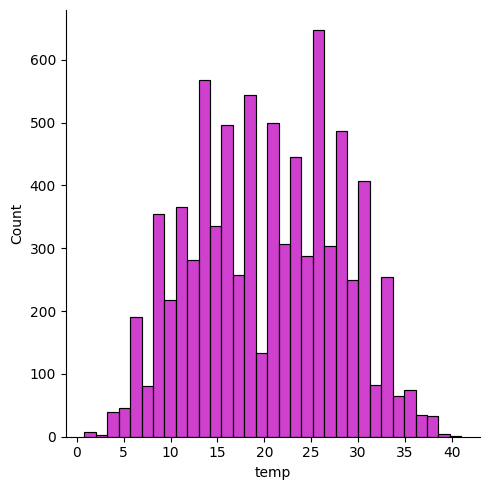

In [147]:
sns.displot(df["temp"], kde=False , color='m')

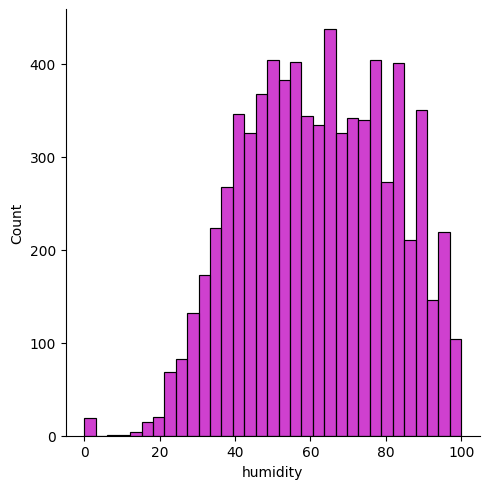

In [148]:
sns.displot(df["humidity"], kde=False , color='m')

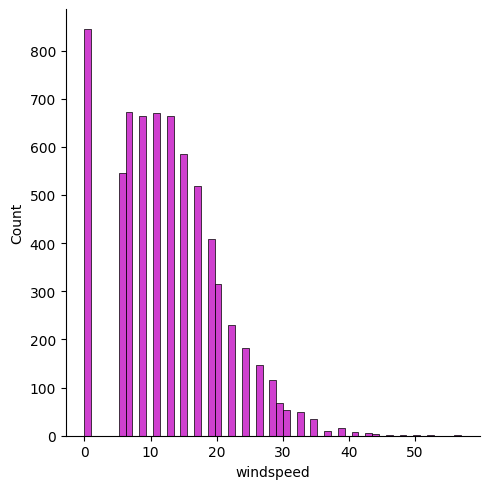

In [149]:
sns.displot(df["windspeed"], kde=False , color='m')

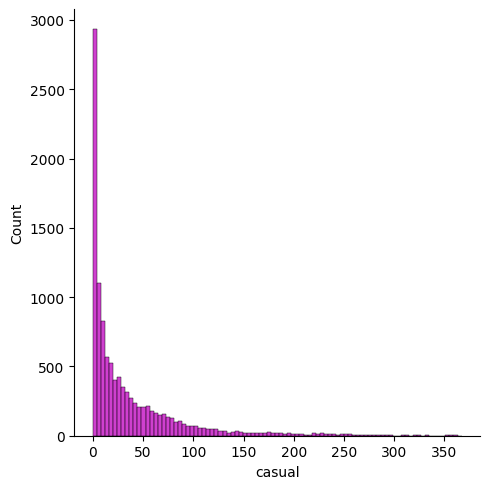

In [150]:
sns.displot(df["casual"], kde=False , color='m')

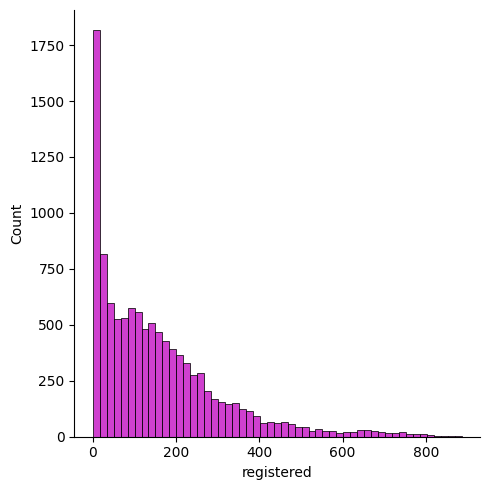

In [151]:
sns.displot(df["registered"], kde=False , color='m')

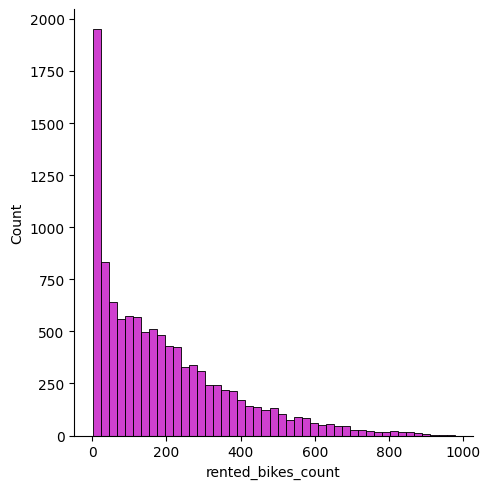

In [152]:
sns.displot(df["rented_bikes_count"], kde=False , color='m')

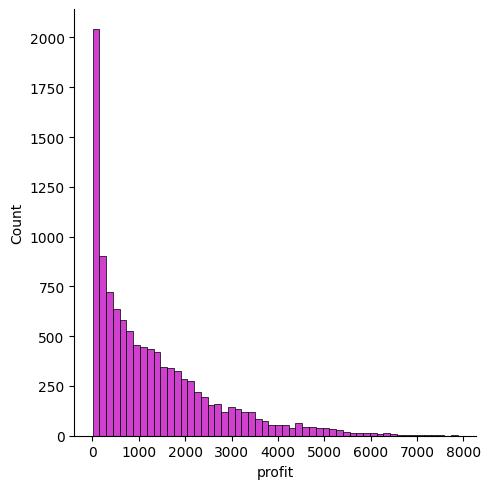

In [153]:
sns.displot(df["profit"], kde=False , color='m')

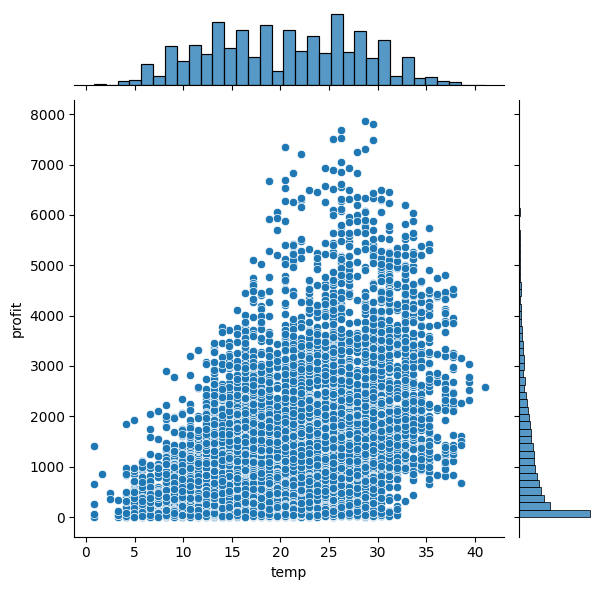

In [154]:
sns.jointplot(x=df["temp"],y=df["profit"])

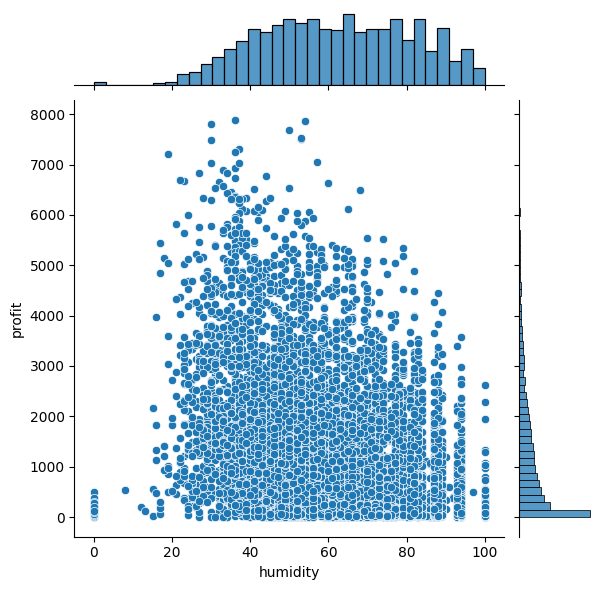

In [155]:
sns.jointplot(x=df["humidity"],y=df["profit"])

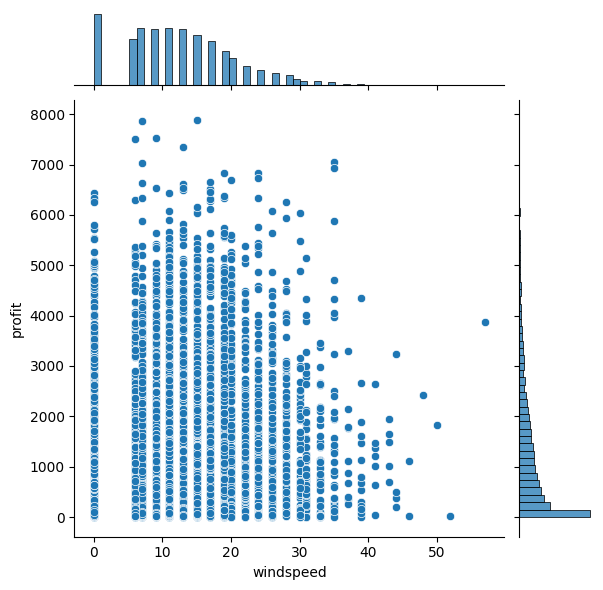

In [156]:
sns.jointplot(x=df["windspeed"],y=df["profit"])

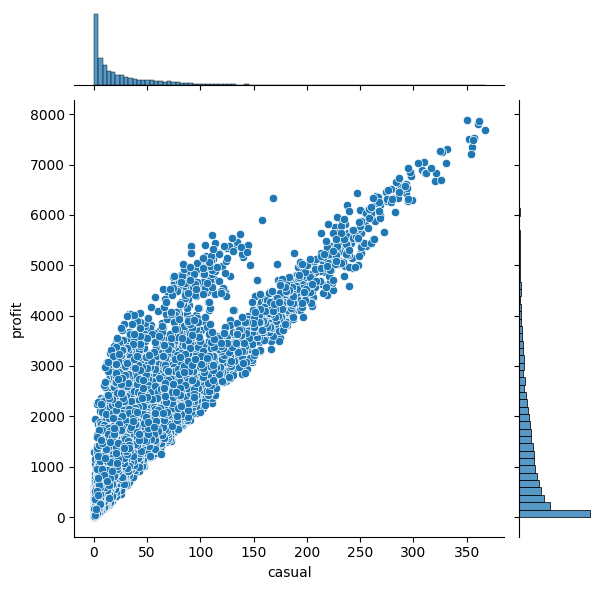

In [157]:
sns.jointplot(x=df["casual"],y=df["profit"])

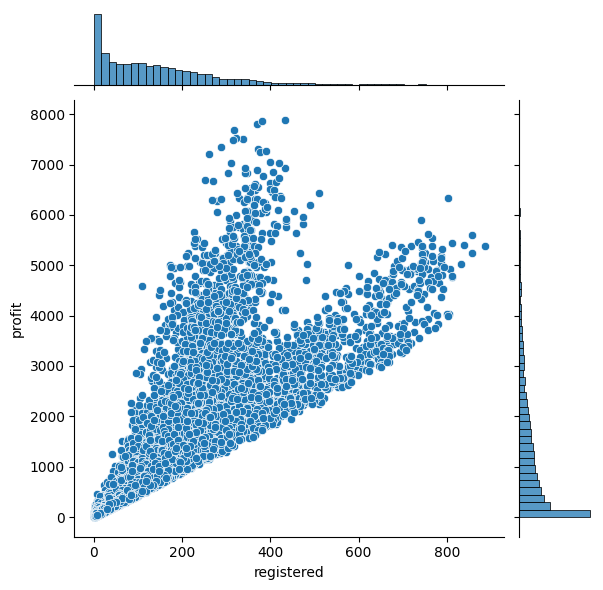

In [158]:
sns.jointplot(x=df["registered"],y=df["profit"])

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9524\3088096889.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season',data=df,palette="flare")


<Axes: xlabel='season', ylabel='count'>

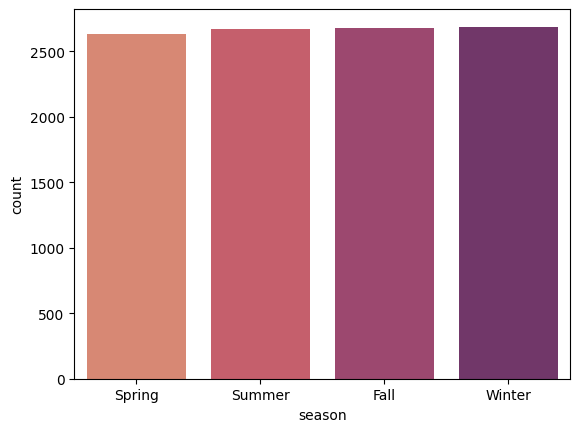

In [159]:
sns.countplot(x='season',data=df,palette="flare")

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9524\4255197513.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='holiday',data=df,palette="flare")


<Axes: xlabel='holiday', ylabel='count'>

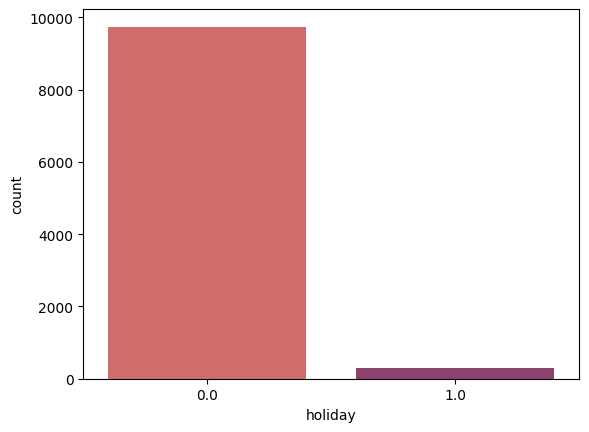

In [160]:
sns.countplot(x='holiday',data=df,palette="flare")

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9524\1169400331.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='workingday',data=df,palette="flare")


<Axes: xlabel='workingday', ylabel='count'>

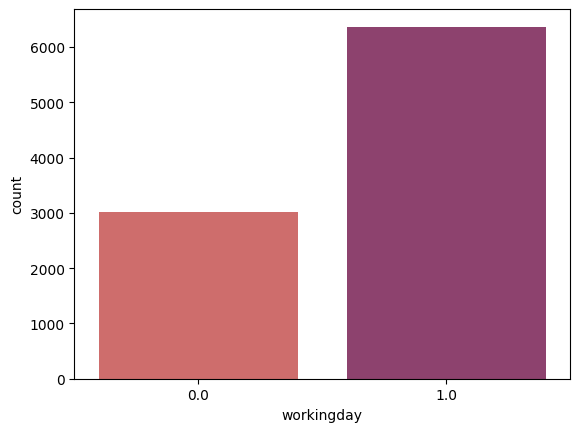

In [161]:
sns.countplot(x='workingday',data=df,palette="flare")

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9524\542189447.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather',data=df,palette="flare")


<Axes: xlabel='weather', ylabel='count'>

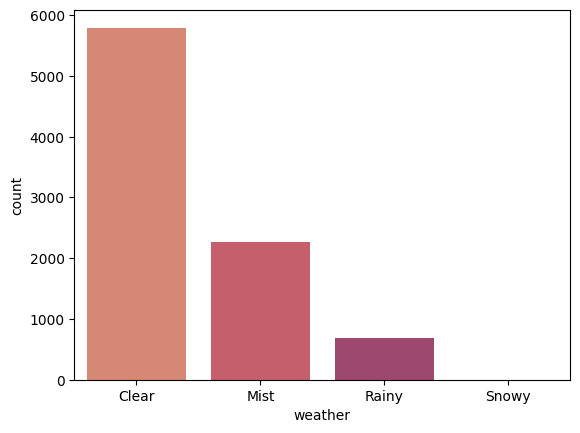

In [162]:
sns.countplot(x='weather',data=df,palette="flare")

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9524\1601009395.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year',data=df,palette="flare")


<Axes: xlabel='year', ylabel='count'>

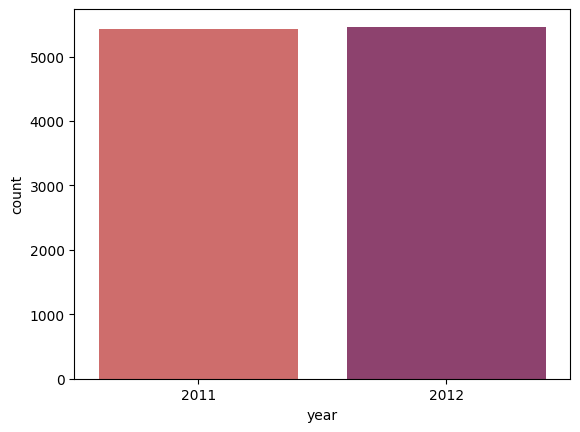

In [163]:
sns.countplot(x='year',data=df,palette="flare")

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9524\3318999623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month',data=df,palette="flare")


<Axes: xlabel='month', ylabel='count'>

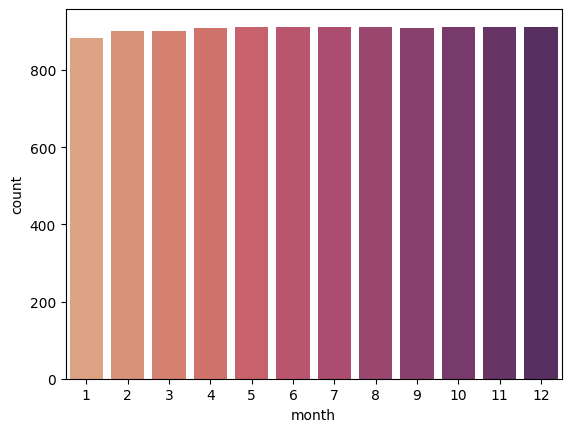

In [164]:
sns.countplot(x='month',data=df,palette="flare")

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9524\1165965676.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week',data=df,palette="flare")


<Axes: xlabel='day_of_week', ylabel='count'>

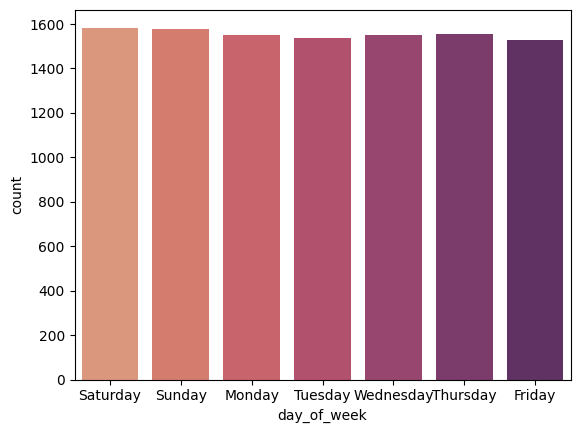

In [165]:
sns.countplot(x='day_of_week',data=df,palette="flare")

C:\Users\Hamed\AppData\Local\Temp\ipykernel_9524\2674772727.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hours',data=df,palette="flare")


<Axes: xlabel='hours', ylabel='count'>

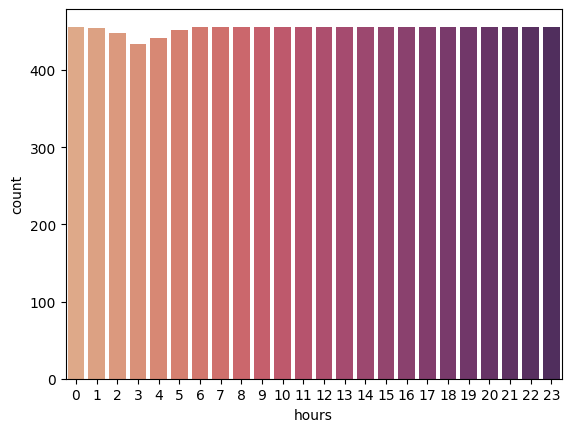

In [166]:
sns.countplot(x='hours',data=df,palette="flare")

In [167]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'year', 'month', 'day_of_week', 'hours', 'is_rush'],
      dtype='object')

<Axes: xlabel='season', ylabel='profit'>

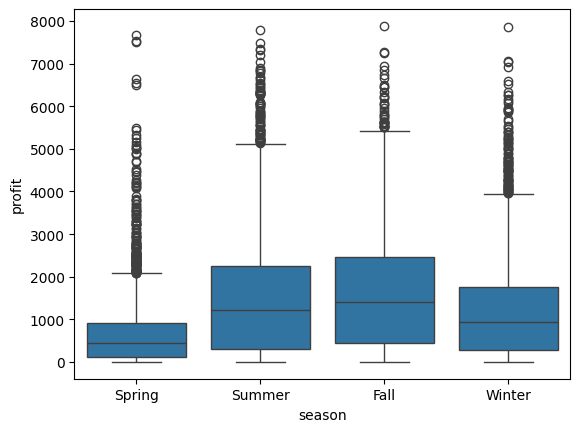

In [168]:
sns.boxplot(x="season",y="profit",data=df)

<Axes: xlabel='holiday', ylabel='profit'>

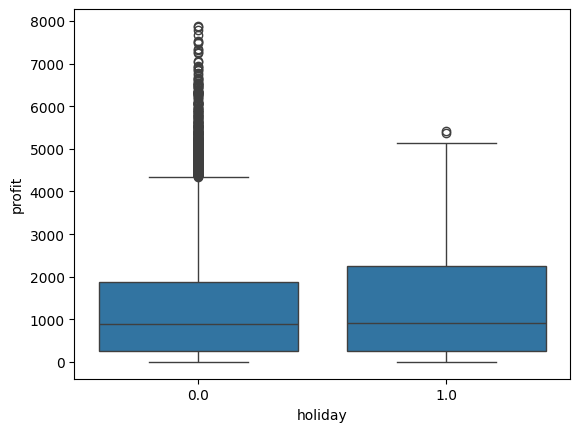

In [169]:
sns.boxplot(x="holiday",y="profit",data=df)

<Axes: xlabel='workingday', ylabel='profit'>

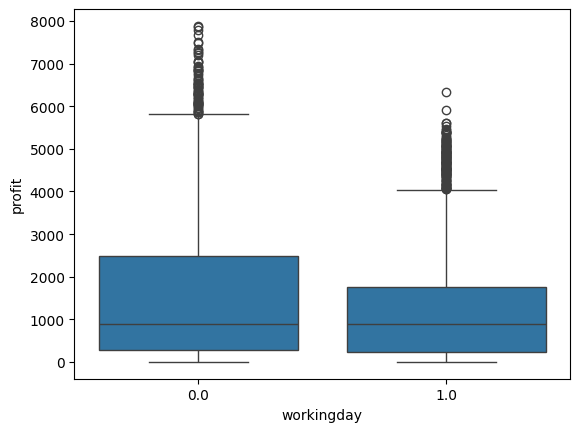

In [170]:
sns.boxplot(x="workingday",y="profit",data=df)

<Axes: xlabel='weather', ylabel='profit'>

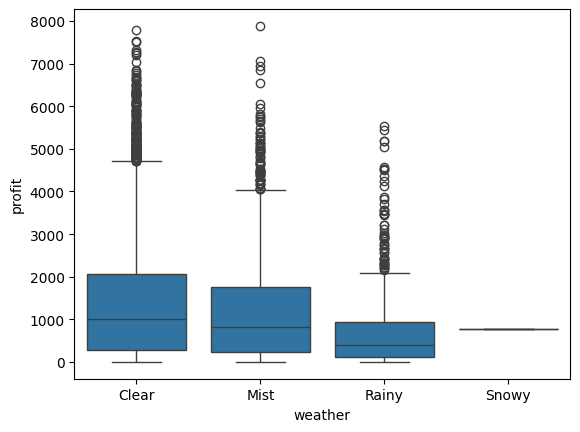

In [171]:
sns.boxplot(x="weather",y="profit",data=df)

<Axes: xlabel='profit', ylabel='day_of_week'>

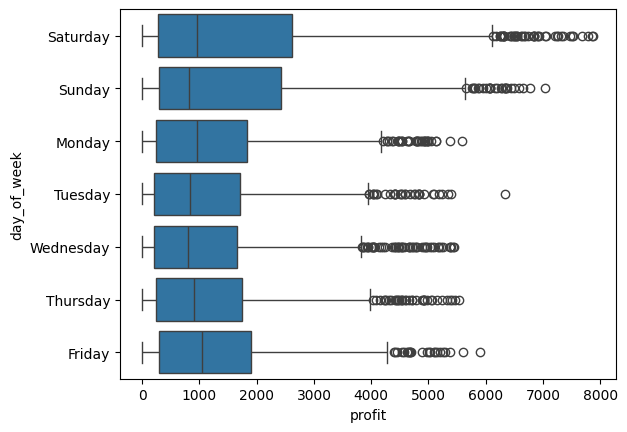

In [172]:
sns.boxplot(y="day_of_week",x="profit",data=df)

<Axes: xlabel='hours', ylabel='profit'>

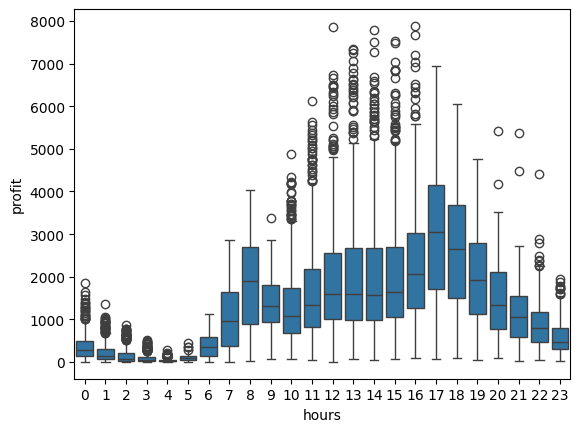

In [173]:
sns.boxplot(x="hours",y="profit",data=df)

In [174]:
new_df=pd.pivot_table(data=df, values='profit',columns="day_of_week",index='month')
new_df

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,562.122384,391.098271,583.123767,507.168627,565.983389,471.271287,422.948767
2,720.246498,575.349820,663.462100,565.585910,561.281584,537.583852,589.928063
3,819.221021,968.421987,1401.718350,1258.993724,873.243556,759.302717,865.646414
4,1154.450434,1347.061161,1564.097100,1901.682934,1298.500434,1145.928073,1017.447255
5,1654.002934,1172.976267,2287.966267,1791.423767,1477.266962,1251.994739,1189.405850
6,1575.002378,1474.728767,2399.467656,2142.542656,1422.161267,1441.439600,1451.257934
7,1685.607934,1704.002378,2129.260434,1874.837795,1607.132934,1472.459323,1682.382934
8,1620.510712,1476.018767,2177.205434,1696.931267,1571.299600,1531.130434,1557.712795
9,1501.890434,1599.458837,2141.885712,2215.463489,1217.921204,1294.020364,1420.942934


<Axes: xlabel='day_of_week', ylabel='month'>

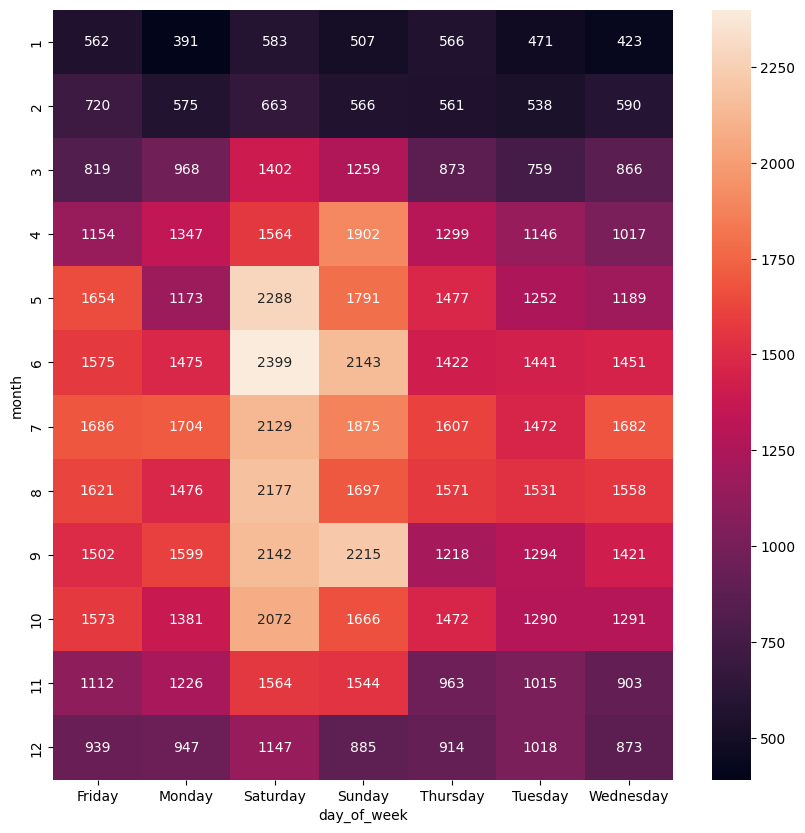

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df,annot=True,fmt='0.0f')

In [176]:
for col in [
 'temp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'rented_bikes_count',
 'profit']:
    df[col]=pd.to_numeric(df[col],errors='coerce')
    
    
    

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
 12  year                10886 non-null  int32         
 13  month               10886 non-null  int32     

In [178]:
df.describe()

,datetime,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,hours,is_rush
count,10886,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,1288.280751,2011.501929,6.521495,11.541613,0.251056
min,2011-01-01 00:00:00,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,4.128767,2011.000000,1.000000,0.000000,0.000000
25%,2011-07-02 07:15:00,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,253.528767,2011.000000,4.000000,6.000000,0.000000
50%,2012-01-01 20:30:00,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,889.928767,2012.000000,7.000000,12.000000,0.000000
75%,2012-07-01 12:45:00,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.828767,2012.000000,10.000000,18.000000,1.000000
max,2012-12-19 23:00:00,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.728767,2012.000000,12.000000,23.000000,1.000000
std,NaN,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,1309.683400,0.500019,3.444373,6.915838,0.433641


In [179]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'year', 'month', 'day_of_week', 'hours', 'is_rush'],
      dtype='object')

In [180]:
for col in ['season','holiday','workingday','weather','year','month','day_of_week','hours']:
    print(f"----------{col}------------")
    print(df[col].unique())
    print('====================================')

----------season------------
['Spring' nan 'Summer' 'Fall' 'Winter']
----------holiday------------
[ 0. nan  1.]
----------workingday------------
[ 0. nan  1.]
----------weather------------
['Clear' nan 'Mist' 'Rainy' 'Snowy']
----------year------------
[2011 2012]
----------month------------
[ 1  2  3  4  5  6  7  8  9 10 11 12]
----------day_of_week------------
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
----------hours------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [181]:
df.isna().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
profit                   0
year                     0
month                    0
day_of_week              0
hours                    0
is_rush                  0
dtype: int64

In [182]:
df.drop("windspeed",inplace=True, axis=1)


In [183]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,profit,year,month,day_of_week,hours,is_rush
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,3,13,16,107.328767,2011,1,Saturday,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,8,32,40,275.028767,2011,1,Saturday,1,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,5,27,32,201.928767,2011,1,Saturday,2,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,3,10,13,94.428767,2011,1,Saturday,3,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,0,1,1,4.128767,2011,1,Saturday,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,7,329,336,1534.928767,2012,12,Wednesday,19,0
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,10,231,241,1165.128767,2012,12,Wednesday,20,0
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,4,164,168,773.828767,2012,12,Wednesday,21,0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,12,117,129,709.328767,2012,12,Wednesday,22,0


In [184]:
df.dropna(subset=["season"],axis=0,inplace=True)

In [185]:
df.isna().sum()

datetime                 0
season                   0
holiday                834
workingday            1474
weather               2093
temp                  2732
humidity              3367
casual                   0
registered               0
rented_bikes_count       0
profit                   0
year                     0
month                    0
day_of_week              0
hours                    0
is_rush                  0
dtype: int64

In [186]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()

for col in ['holiday', 'workingday', 'temp','humidity']:
    df[col]=imputer.fit_transform(df[[col]])

In [197]:
##convert categorical"string" with simple imputer
from sklearn.impute import SimpleImputer

df['weather'] = df['weather'].astype('object')
# Initialize the SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')
# Fit and transform the 'weather' column and flatten the result
df['weather'] = imputer.fit_transform(df[['weather']]).ravel()

In [198]:
df.isna().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
humidity              0
casual                0
registered            0
rented_bikes_count    0
profit                0
year                  0
month                 0
day_of_week           0
hours                 0
is_rush               0
dtype: int64

In [199]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'casual', 'registered', 'rented_bikes_count', 'profit',
       'year', 'month', 'day_of_week', 'hours', 'is_rush'],
      dtype='object')

In [200]:
df=df[["season","holiday","workingday",'weather','temp','humidity','rented_bikes_count',
      'profit','month',"day_of_week",'hours']]
df

,season,holiday,workingday,weather,temp,humidity,rented_bikes_count,profit,month,day_of_week,hours
0,Spring,0.000000,0.0,Clear,9.840000,81.000000,16,107.328767,1,Saturday,0
1,Spring,0.000000,0.0,Clear,9.020000,80.000000,40,275.028767,1,Saturday,1
2,Spring,0.000000,0.0,Clear,9.020000,61.849829,32,201.928767,1,Saturday,2
3,Spring,0.000000,0.0,Clear,9.840000,75.000000,13,94.428767,1,Saturday,3
6,Spring,0.000000,0.0,Clear,20.299854,61.849829,2,34.228767,1,Saturday,6
...,...,...,...,...,...,...,...,...,...,...,...
10880,Winter,0.000000,1.0,Clear,15.580000,61.849829,569,2743.228767,12,Wednesday,18
10881,Winter,0.000000,1.0,Clear,15.580000,50.000000,336,1534.928767,12,Wednesday,19
10882,Winter,0.000000,1.0,Clear,14.760000,61.849829,241,1165.128767,12,Wednesday,20
10884,Winter,0.028868,1.0,Clear,13.940000,61.849829,129,709.328767,12,Wednesday,22


In [201]:
df=pd.get_dummies(df,columns=["season",'weather','day_of_week'],drop_first=True)
df

,holiday,workingday,temp,humidity,rented_bikes_count,profit,month,hours,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0.000000,0.0,9.840000,81.000000,16,107.328767,1,0,True,False,False,False,False,False,False,True,False,False,False,False
1,0.000000,0.0,9.020000,80.000000,40,275.028767,1,1,True,False,False,False,False,False,False,True,False,False,False,False
2,0.000000,0.0,9.020000,61.849829,32,201.928767,1,2,True,False,False,False,False,False,False,True,False,False,False,False
3,0.000000,0.0,9.840000,75.000000,13,94.428767,1,3,True,False,False,False,False,False,False,True,False,False,False,False
6,0.000000,0.0,20.299854,61.849829,2,34.228767,1,6,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,0.000000,1.0,15.580000,61.849829,569,2743.228767,12,18,False,False,True,False,False,False,False,False,False,False,False,True
10881,0.000000,1.0,15.580000,50.000000,336,1534.928767,12,19,False,False,True,False,False,False,False,False,False,False,False,True
10882,0.000000,1.0,14.760000,61.849829,241,1165.128767,12,20,False,False,True,False,False,False,False,False,False,False,False,True
10884,0.028868,1.0,13.940000,61.849829,129,709.328767,12,22,False,False,True,False,False,False,False,False,False,False,False,True


In [202]:
x=df.drop("profit",axis=1)
y=df["profit"]

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=123)

In [204]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [206]:
models={
    "LR":LinearRegression(),
     "SVM":SVR(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor()}

In [207]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_train, y_train)
    print(f'Training Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')  
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')
    print('-'*30)

Using model: LR
Training Score: 0.9120986745980803
Test Score: 0.9164560857479975
RMSE: 364.3681235676433
------------------------------
Using model: SVM
Training Score: 0.16497303184298362
Test Score: 0.19208785639589565
RMSE: 1133.091637764079
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.9688597404915299
RMSE: 222.45597762538242
------------------------------
Using model: RF
Training Score: 0.997436215305738
Test Score: 0.9841406914909125
RMSE: 158.75415115867233
------------------------------


In [208]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()